<a href="https://colab.research.google.com/github/Slimani-CE/digit-classifier-ml/blob/master/MNIST_ANN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

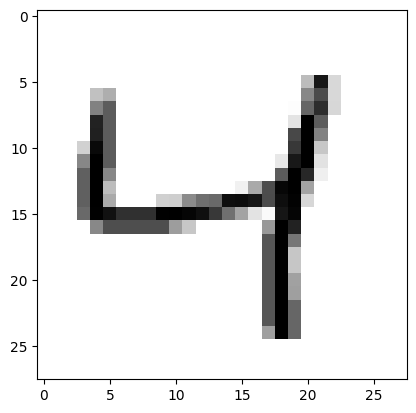

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap = plt.cm.binary)

In [6]:
np.set_printoptions(linewidth = np.inf)
print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

# Normalize the dataset

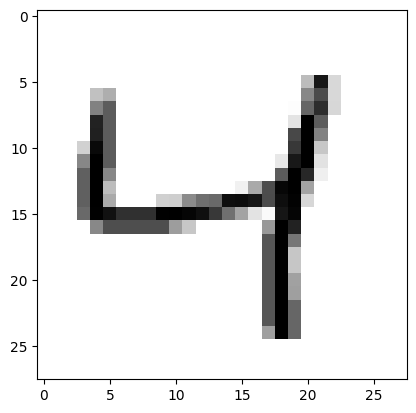

In [7]:
X_train = X_train / 255
X_test = X_test / 255

plt.imshow(X_train[2], cmap = plt.cm.binary)

#Resizing images

In [8]:
IMG_SIZE = 28
X_train_resized = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test_resized = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension : ", X_train_resized.shape)
print("Test samples dimension : ", X_test_resized.shape)

Training samples dimension :  (60000, 28, 28, 1)
Test samples dimension :  (10000, 28, 28, 1)


# Train deep learning model

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 4ms/step - loss: 0.2789 - accuracy: 0.9183 - val_loss: 0.1491 - val_accuracy: 0.9530
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1170 - accuracy: 0.9647 - val_loss: 0.1242 - val_accuracy: 0.9632
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0972 - val_accuracy: 0.9697
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0629 - accuracy: 0.9803 - val_loss: 0.0995 - val_accuracy: 0.9709
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.0887 - val_accuracy: 0.9742
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0967 - val_accuracy: 0.9745
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.1011 - val_accuracy

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss on 10,000 test samples : ", test_loss)
print("Validation accuracy on 10,000 test samples : ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1503 - accuracy: 0.9749
Test loss on 10,000 test samples :  0.15034982562065125
Validation accuracy on 10,000 test samples :  0.9749000072479248


In [14]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
print(np.argmax(predictions[45]))

5


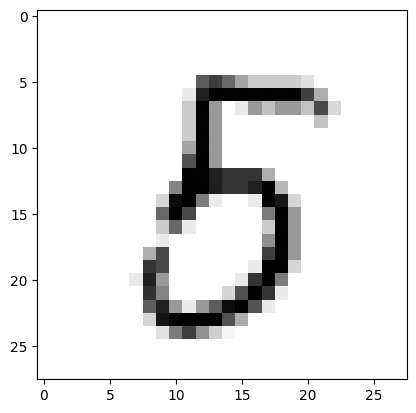

In [16]:
plt.imshow(X_test[45], cmap = plt.cm.binary)

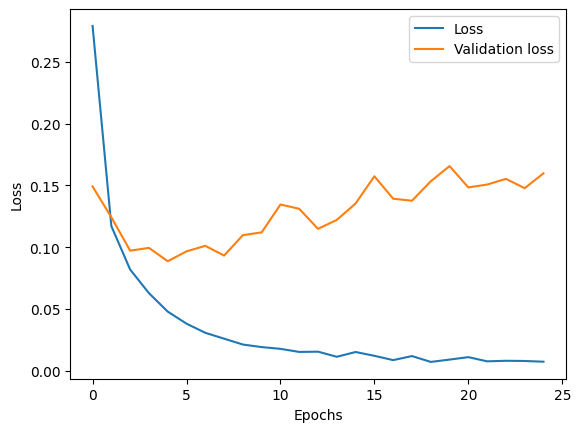

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation loss'])
plt.show()

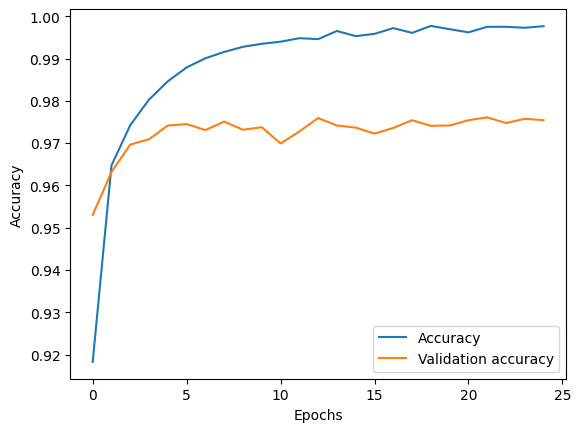

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation accuracy'])
plt.show()

In [24]:
import cv2

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
# img = cv2.imread('sex.jpg', cv2.IMREAD_UNCHANGED)[:,:,-1]
# plt.imshow(img)

# resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
# newImg = resized / 255
# newImg = np.array(newImg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# prediction = model.predict(newImg)

# print("Predicted value: ", np.argmax(prediction))

## Exporting the model

In [27]:
# Create a class that will contain the model and image preprocesing method
class DigitClassifier:
  def __init__(self, model, IMG_SIZE):
    self.model = model
    self.IMG_SIZE = IMG_SIZE

  def predict(self, img):
    img = img[:, :, -1]

    resized = cv2.resize(
        img, (self.IMG_SIZE, self.IMG_SIZE), interpolation=cv2.INTER_AREA)
    newImg = resized / 255
    newImg = np.array(newImg).reshape(-1, self.IMG_SIZE, self.IMG_SIZE, 1)

    prediction = self.model.predict(newImg)

    index = np.argmax(prediction)

    return index, prediction[index]

classifier = DigitClassifier(model, IMG_SIZE)

In [28]:
# Export the model using pickle
import pickle

with open('digit-classifier-model.pkl', 'wb') as file:
    pickle.dump(classifier, file)